## For visualization, we will use matplotlib and seaborn
* [matplotlib](https://matplotlib.org/stable/plot_types/index.html) covers basic graphs
* [seaborn](https://seaborn.pydata.org/examples/index.html) contains advanced graphs and can make use of pandas's DataFrame directly

In [1]:
# !pip install seaborn

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

## Load gene expression dataset

In [2]:
data = pd.read_excel('CRC_sample_data.xlsx', sheet_name = 'expression', header = 0, index_col = 0)
data.head()

,FAP,SLC5A6,GFPT2,ASCL2,TSPAN6,CCDC80,DUSP4,EFEMP2,TRIM7,DCN,AGR2,REG4,TUBB6,POFUT1,RETNLB,CMS
SampleID,,,,,,,,,,,,,,,,
Patient1,5.317879,7.521597,5.458581,7.873975,6.777987,5.148662,6.372153,6.495578,5.361258,7.529628,9.910427,6.563663,6.467622,6.556573,5.782625,CMS1
Patient2,5.462626,7.613383,3.996901,7.036830,7.610739,5.583870,6.889211,6.049421,6.075198,7.027278,8.972537,5.544412,6.861825,5.765743,4.195767,CMS1
Patient3,5.364091,8.152112,4.220819,4.225933,7.615335,5.042837,6.566867,6.224913,4.497239,6.609805,8.543011,7.602395,6.057700,6.179182,3.402747,CMS1
Patient4,7.241834,6.989748,5.535980,7.283076,6.760564,7.076600,6.418798,7.018138,5.620279,8.986782,8.049796,7.436953,8.252535,5.978596,2.750682,CMS1
Patient5,5.732008,7.252843,5.003082,6.519208,8.357291,5.660058,4.525700,6.506203,5.300539,7.059266,10.547725,7.424943,6.674952,5.850525,4.431800,CMS1


## Visualization code template

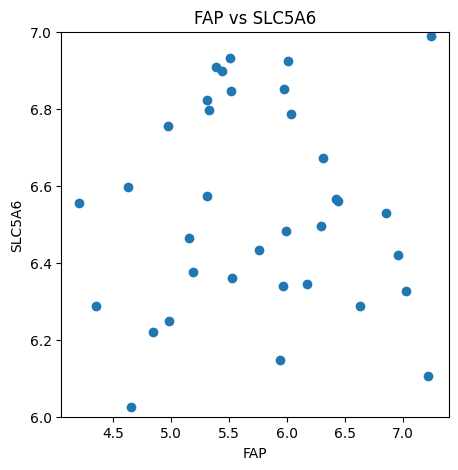

In [11]:
plt.figure(figsize = (5, 5))

plt.scatter(data['FAP'], data['SLC5A6'])

plt.xlabel('FAP')
plt.ylabel('SLC5A6')
plt.title('FAP vs SLC5A6')

# plt.axis([6, 7, 6, 7])
# plt.xlim([6, 7])
plt.ylim([6, 7])

# plt.savefig('figure.png', dpi = 200)
plt.savefig('figure.svg', dpi = 70)
plt.show()

## Multiple graphs can be placed on the same figure, with automatic coloring
Use **label** parameter and **legend()** to distinguish plots 

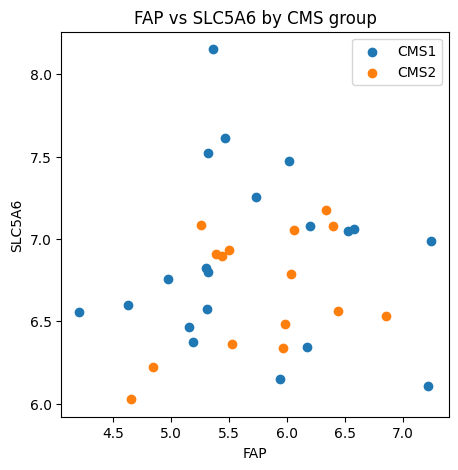

In [12]:
plt.figure(figsize = (5, 5))

plt.scatter(data.loc[data['CMS'] == 'CMS1', 'FAP'], 
            data.loc[data['CMS'] == 'CMS1', 'SLC5A6'],
            label = 'CMS1')

plt.scatter(data.loc[data['CMS'] == 'CMS2', 'FAP'], 
            data.loc[data['CMS'] == 'CMS2', 'SLC5A6'],
            label = 'CMS2')

plt.xlabel('FAP')
plt.ylabel('SLC5A6')
plt.title('FAP vs SLC5A6 by CMS group')

plt.legend()
plt.show()

## Key visualization settings
* Color
* Shape
* Size
* Transparency

### Color, shape, and transparency

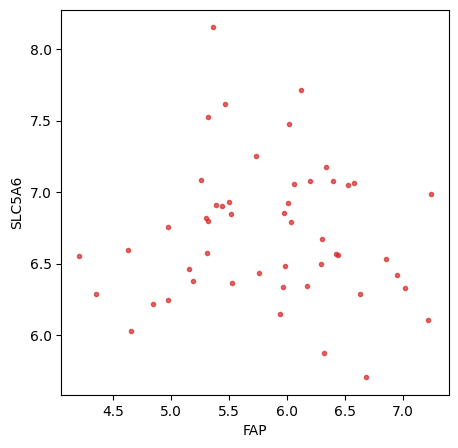

In [15]:
plt.figure(figsize = (5, 5))

plt.scatter(data['FAP'], data['SLC5A6'],
            color = 'tab:red',
            marker = '.',
            alpha = 0.7)

plt.xlabel('FAP')
plt.ylabel('SLC5A6')

plt.show()

### Size

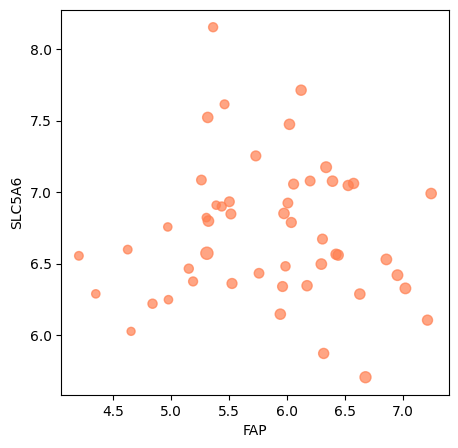

In [18]:
plt.figure(figsize = (5, 5))

plt.scatter(data['FAP'], data['SLC5A6'],
            color = 'coral',
            marker = 'o',
            s = data['GFPT2'] * 10,
            alpha = 0.7)

plt.xlabel('FAP')
plt.ylabel('SLC5A6')

plt.show()

## Essentially infinite [color choices](https://matplotlib.org/stable/gallery/color/named_colors.html)

## Integration of for loop with visualization

In [19]:
print(pd.unique(data['CMS']))

['CMS1' 'CMS2' 'CMS3']


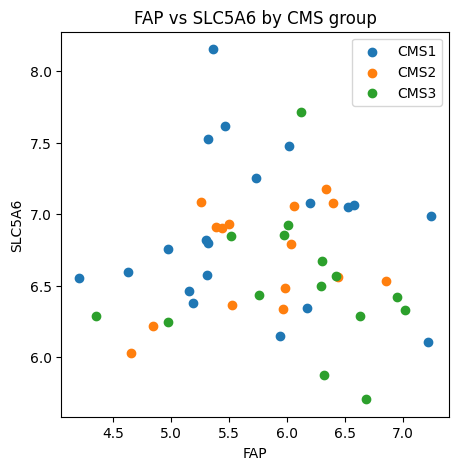

In [20]:
plt.figure(figsize = (5, 5))

for cms in pd.unique(data['CMS']):
    plt.scatter(data.loc[data['CMS'] == cms, 'FAP'], 
                data.loc[data['CMS'] == cms, 'SLC5A6'],
                label = cms)

plt.xlabel('FAP')
plt.ylabel('SLC5A6')
plt.title('FAP vs SLC5A6 by CMS group')

plt.legend()
plt.show()

## Histogram

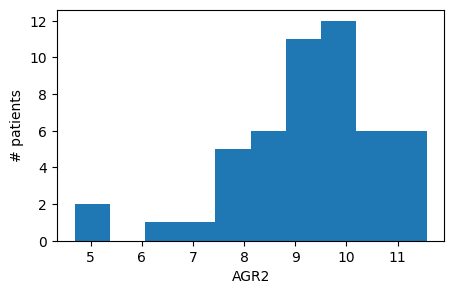

In [21]:
plt.figure(figsize = (5, 3))

plt.hist(data['AGR2'])

plt.xlabel('AGR2')
plt.ylabel('# patients')

plt.show()

### Bin sizes
numpy.arange is similar to range but can operate on real numbers, not just integers

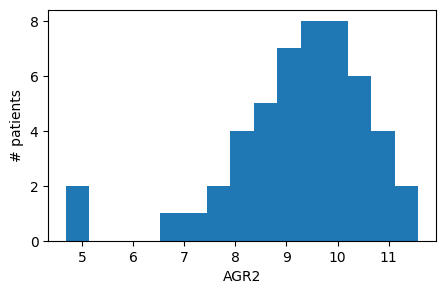

In [26]:
plt.figure(figsize = (5, 3))

plt.hist(data['AGR2'], bins = 15)

plt.xlabel('AGR2')
plt.ylabel('# patients')

plt.show()

## Overlay histograms
Transparency is the key

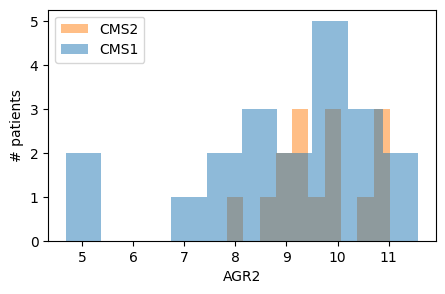

In [29]:
plt.figure(figsize = (5, 3))

plt.hist(data.loc[data['CMS'] == 'CMS2', 'AGR2'], facecolor = 'tab:orange', alpha = 0.5, label = 'CMS2')
plt.hist(data.loc[data['CMS'] == 'CMS1', 'AGR2'], facecolor = 'tab:blue', alpha = 0.5, label = 'CMS1')

plt.xlabel('AGR2')
plt.ylabel('# patients')

plt.legend()
plt.show()

### Control bin size to match multiple histograms

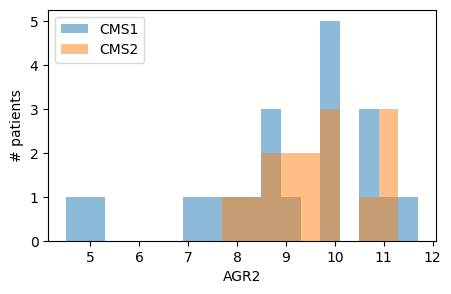

In [30]:
common_bins = np.arange(4.5, 12, 0.4)

plt.figure(figsize = (5, 3))

plt.hist(data.loc[data['CMS'] == 'CMS1', 'AGR2'], facecolor = 'tab:blue', alpha = 0.5, label = 'CMS1', bins = common_bins)
plt.hist(data.loc[data['CMS'] == 'CMS2', 'AGR2'], facecolor = 'tab:orange', alpha = 0.5, label = 'CMS2', bins = common_bins)

plt.xlabel('AGR2')
plt.ylabel('# patients')

plt.legend()
plt.show()

## Convert count to density
Set **density** = True

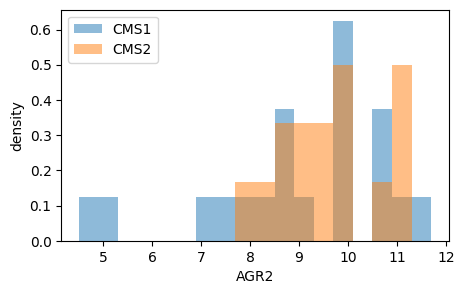

In [31]:
common_bins = np.arange(4.5, 12, 0.4)

plt.figure(figsize = (5, 3))

plt.hist(data.loc[data['CMS'] == 'CMS1', 'AGR2'], facecolor = 'tab:blue', alpha = 0.5, label = 'CMS1', bins = common_bins,
         density = True)
plt.hist(data.loc[data['CMS'] == 'CMS2', 'AGR2'], facecolor = 'tab:orange', alpha = 0.5, label = 'CMS2', bins = common_bins,
         density = True)

plt.xlabel('AGR2')
plt.ylabel('density')

plt.legend()
plt.show()

## Comparing histogram side-by-side with subplot

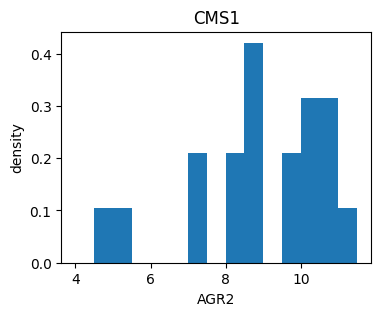

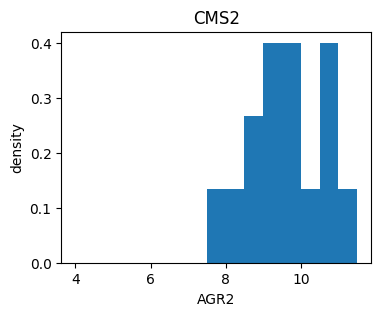

In [33]:
common_bins = np.arange(4, 12, 0.5)

plt.figure(figsize = (4, 3))

plt.hist(data.loc[data['CMS'] == 'CMS1', 'AGR2'], bins = common_bins, density = True)
plt.xlabel('AGR2')
plt.ylabel('density')
plt.title('CMS1')

plt.show()

plt.figure(figsize = (4, 3))
plt.hist(data.loc[data['CMS'] == 'CMS2', 'AGR2'], bins = common_bins, density = True)
plt.xlabel('AGR2')
plt.ylabel('density')
plt.title('CMS2')

plt.show()

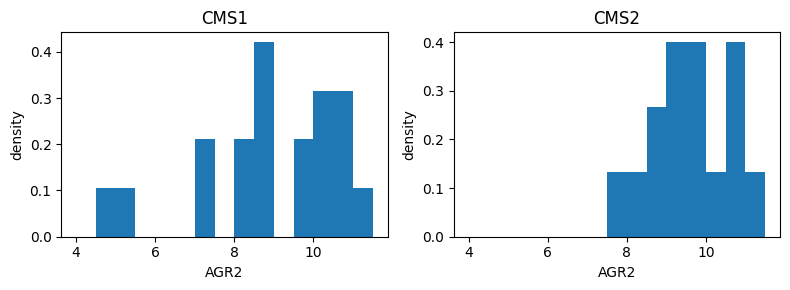

In [37]:
common_bins = np.arange(4, 12, 0.5)

plt.figure(figsize = (8, 3))

plt.subplot(1, 2, 1)
plt.hist(data.loc[data['CMS'] == 'CMS1', 'AGR2'], bins = common_bins, density = True)
plt.xlabel('AGR2')
plt.ylabel('density')
plt.title('CMS1')

plt.subplot(1, 2, 2)
plt.hist(data.loc[data['CMS'] == 'CMS2', 'AGR2'], bins = common_bins, density = True)
plt.xlabel('AGR2')
plt.ylabel('density')
plt.title('CMS2')

plt.tight_layout()

plt.show()

## Box plot & violin plot

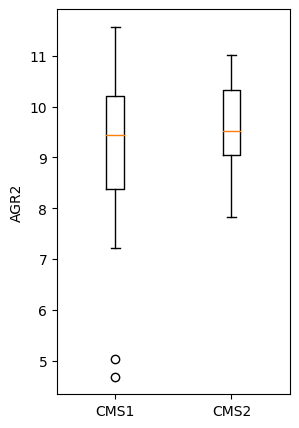

In [44]:
plt.figure(figsize = (3, 5))

plt.boxplot([data.loc[data['CMS'] == 'CMS1', 'AGR2'], 
             data.loc[data['CMS'] == 'CMS2', 'AGR2']], labels = ('CMS1', 'CMS2'))

plt.ylabel('AGR2')

plt.show()

## Horizontal boxplot
Set **vert** to False

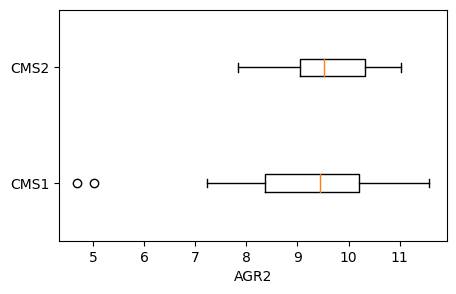

In [47]:
plt.figure(figsize = (5, 3))

plt.boxplot([data.loc[data['CMS'] == 'CMS1', 'AGR2'], 
             data.loc[data['CMS'] == 'CMS2', 'AGR2']], labels = ('CMS1', 'CMS2'), vert = False)

plt.xlabel('AGR2')

plt.show()

## List comprehension with box plot

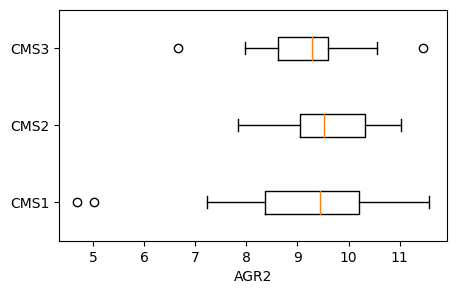

In [48]:
plt.figure(figsize = (5, 3))

plt.boxplot([data.loc[data['CMS'] == cms, 'AGR2'] for cms in pd.unique(data['CMS'])], 
            labels = pd.unique(data['CMS']), vert = False)

plt.xlabel('AGR2')

plt.show()

## Violin plot
We will use violin plot from seaborn because matplotlib's violin plot does not provide much customization

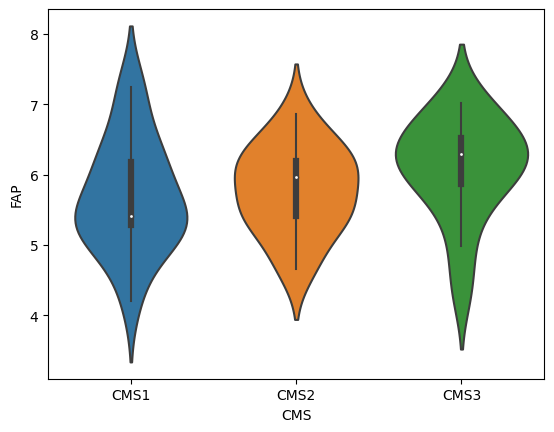

In [50]:
_ = sns.violinplot(data = data, x = 'CMS', y = 'FAP')

## Let's add mutation information to the data

In [3]:
mutation = pd.read_excel('CRC_sample_data.xlsx', sheet_name = 'mutation', index_col = 0)
mutation.head(5)

,KRAS,BRAF,APC,TP53,PIK3CA,PTEN,microsatelite_status
SampleID,,,,,,,
Patient1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Patient2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Patient3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Patient4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Patient5,wt,wt,wt,wt,mt,mt,MSI


In [4]:
merged = pd.concat([data, mutation], axis = 1, join = 'inner')

print(merged.shape)
merged.head(2)

(50, 23)


,FAP,SLC5A6,GFPT2,ASCL2,TSPAN6,CCDC80,DUSP4,EFEMP2,TRIM7,DCN,...,POFUT1,RETNLB,CMS,KRAS,BRAF,APC,TP53,PIK3CA,PTEN,microsatelite_status
SampleID,,,,,,,,,,,,,,,,,,,,,
Patient1,5.317879,7.521597,5.458581,7.873975,6.777987,5.148662,6.372153,6.495578,5.361258,7.529628,...,6.556573,5.782625,CMS1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Patient2,5.462626,7.613383,3.996901,7.036830,7.610739,5.583870,6.889211,6.049421,6.075198,7.027278,...,5.765743,4.195767,CMS1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Violin plot with additional hue component
We can control the components of a seaborn plot via matplotlib

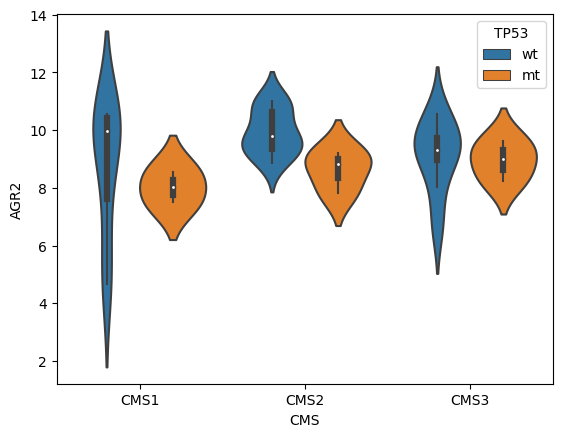

In [55]:
_ = sns.violinplot(data = merged, x = 'CMS', y = 'AGR2', hue = 'TP53')

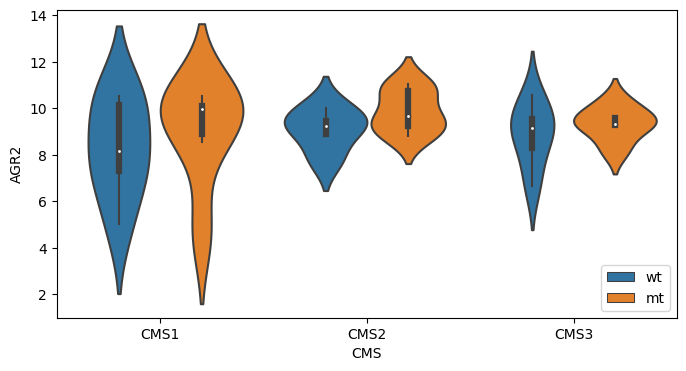

In [56]:
plt.figure(figsize = (8, 4))
_ = sns.violinplot(data = merged, x = 'CMS', y = 'AGR2', hue = 'BRAF')
_ = plt.legend(loc = 'lower right')

## Computing and visualizing coexpression
Pandas DataFrame has a built-in *corr* function 

In [5]:
expr_data = data.iloc[:, :-1]
coexpr = expr_data.corr(method = 'pearson')
coexpr.head()

,FAP,SLC5A6,GFPT2,ASCL2,TSPAN6,CCDC80,DUSP4,EFEMP2,TRIM7,DCN,AGR2,REG4,TUBB6,POFUT1,RETNLB
FAP,1.000000,-0.043464,0.650412,0.213900,-0.281874,0.795264,-0.084280,0.879625,0.106744,0.777340,-0.105317,-0.002538,0.624611,0.068079,0.110780
SLC5A6,-0.043464,1.000000,-0.027333,0.214039,0.389461,0.005932,-0.308593,0.010169,-0.345601,-0.001994,-0.183168,-0.401505,-0.124070,0.423339,0.078302
GFPT2,0.650412,-0.027333,1.000000,0.049780,-0.278851,0.570556,-0.067281,0.543837,0.004802,0.558683,-0.410288,-0.262692,0.697781,0.317437,0.100114
ASCL2,0.213900,0.214039,0.049780,1.000000,-0.050653,0.100167,-0.149978,0.222334,-0.003149,0.229477,-0.052278,-0.180376,0.120614,-0.029320,-0.099814
TSPAN6,-0.281874,0.389461,-0.278851,-0.050653,1.000000,-0.199799,-0.403352,-0.226787,-0.168135,-0.139440,-0.027618,-0.146551,-0.221386,0.192526,0.188005


## Several ways to show heatmap
### First, as an image

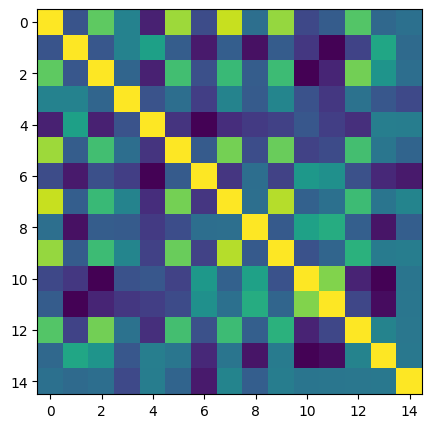

In [60]:
plt.figure(figsize = (5, 5))
plt.imshow(coexpr)
plt.show()

### Customizing [colormap](https://matplotlib.org/stable/gallery/color/colormap_reference.html)
Add colorbar

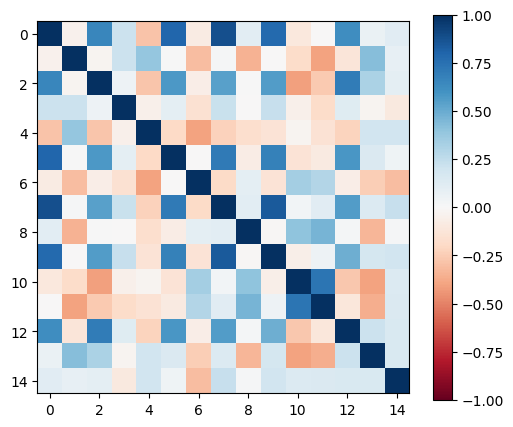

In [61]:
plt.figure(figsize = (6, 5))

plt.imshow(coexpr, cmap = 'RdBu', vmin = -1, vmax = 1)
plt.colorbar()

plt.show()

### Add axis tick annotations

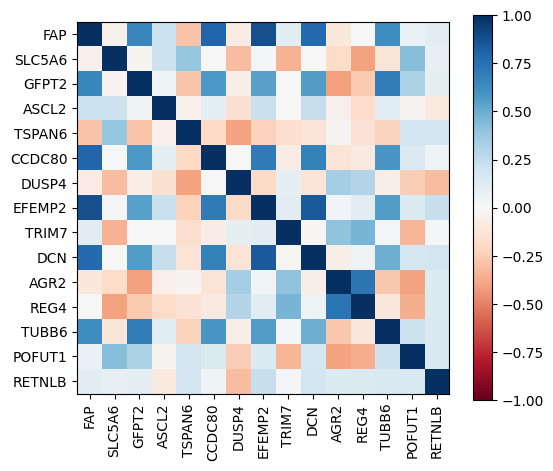

In [62]:
plt.figure(figsize = (6, 5))

plt.imshow(coexpr, cmap = 'RdBu', vmin = -1, vmax = 1)

plt.colorbar()
plt.yticks(range(coexpr.shape[1]), coexpr.columns)
plt.xticks(range(coexpr.shape[1]), coexpr.columns, rotation = 90)

plt.show()

## Seaborn's clustermap

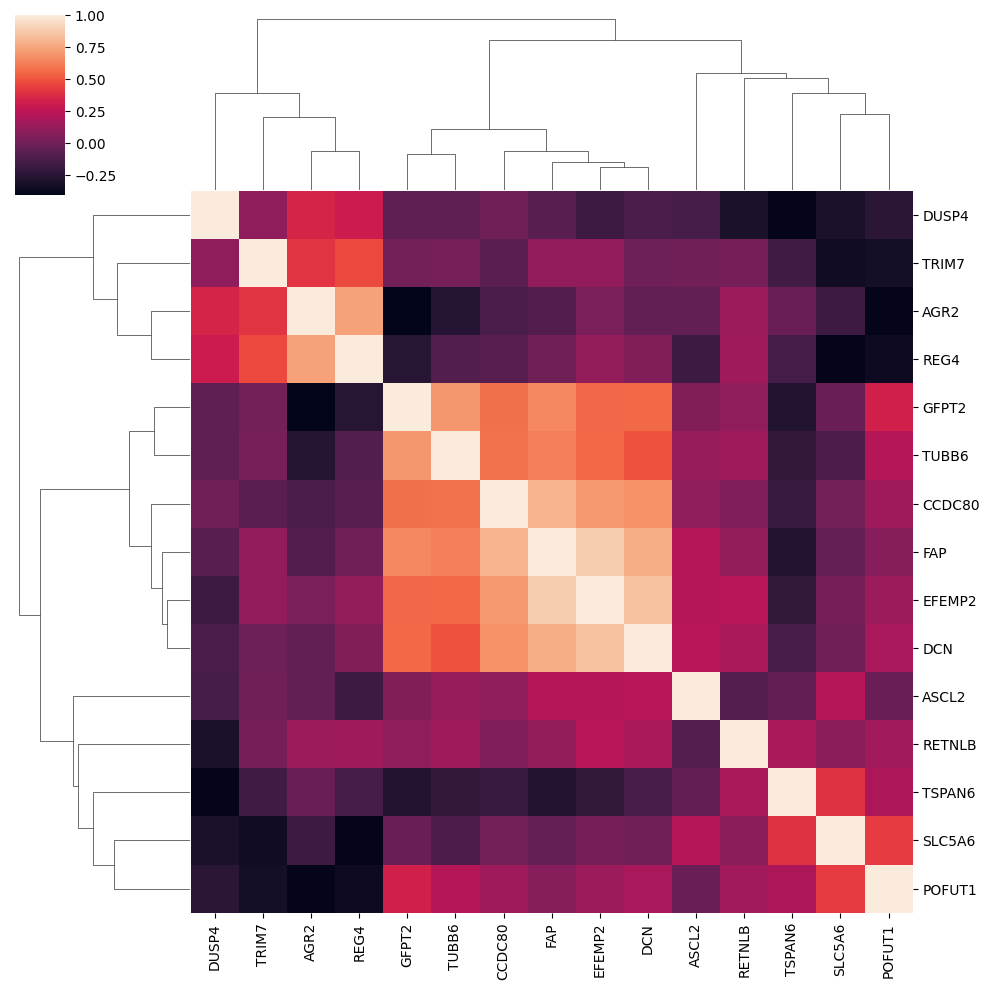

In [63]:
_ = sns.clustermap(coexpr)

### Understanding the components of [clustermap](https://seaborn.pydata.org/generated/seaborn.clustermap.html)

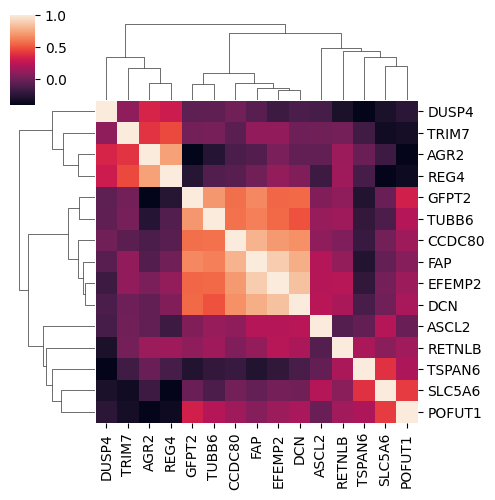

In [67]:
_ = sns.clustermap(data = coexpr, metric = 'euclidean', method = 'average', 
                   z_score = None, standard_scale = None, 
                   figsize = (5, 5), 
                   row_cluster = True, col_cluster = True, 
                   row_colors = None, col_colors = None)

## Let's show similarity between both patient and gene

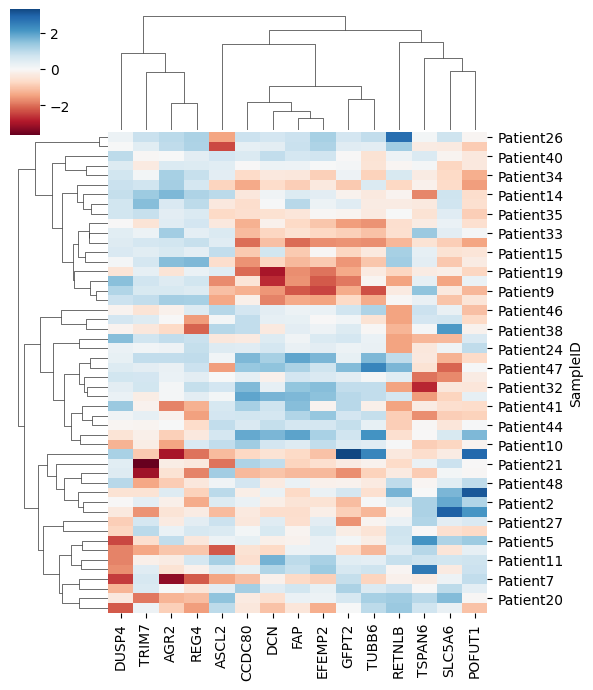

In [70]:
_ = sns.clustermap(data = expr_data, metric = 'correlation', method = 'average', 
                   z_score = 1, figsize = (6, 7), cmap = 'RdBu', center = 0, 
                   row_cluster = True, col_cluster = True, 
                   row_colors = None, col_colors = None)

## Adding CMS group information to the plot
We have to provide colors based on CMS to the *row_colors* or *col_colors* parameter

### Use DataFrame .map() function

In [6]:
cms_color_map = {'CMS1': 'tab:blue', 'CMS2': 'tab:orange', 'CMS3': 'tab:green'}

data['CMS'].map(cms_color_map)

SampleID
Patient1       tab:blue
Patient2       tab:blue
Patient3       tab:blue
Patient4       tab:blue
Patient5       tab:blue
Patient6       tab:blue
Patient7       tab:blue
Patient8       tab:blue
Patient9       tab:blue
Patient10      tab:blue
Patient11      tab:blue
Patient12      tab:blue
Patient13      tab:blue
Patient14      tab:blue
Patient15      tab:blue
Patient16      tab:blue
Patient17      tab:blue
Patient18      tab:blue
Patient19      tab:blue
Patient20      tab:blue
Patient21    tab:orange
Patient22    tab:orange
Patient23    tab:orange
Patient24    tab:orange
Patient25    tab:orange
Patient26    tab:orange
Patient27    tab:orange
Patient28    tab:orange
Patient29    tab:orange
Patient30    tab:orange
Patient31    tab:orange
Patient32    tab:orange
Patient33    tab:orange
Patient34    tab:orange
Patient35    tab:orange
Patient36     tab:green
Patient37     tab:green
Patient38     tab:green
Patient39     tab:green
Patient40     tab:green
Patient41     tab:green
Patient

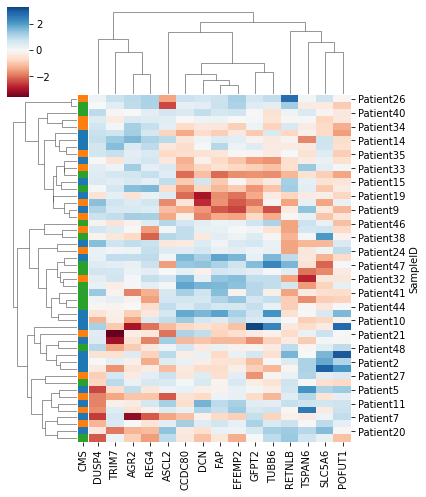

In [7]:
_ = sns.clustermap(data = expr_data, metric = 'correlation', method = 'average', 
                   z_score = 1, figsize = (6, 7), cmap = 'RdBu', center = 0, 
                   row_cluster = True, col_cluster = True, 
                   row_colors = data['CMS'].map(cms_color_map), col_colors = None)

## Color [palettes](https://seaborn.pydata.org/tutorial/color_palettes.html) in seaborn

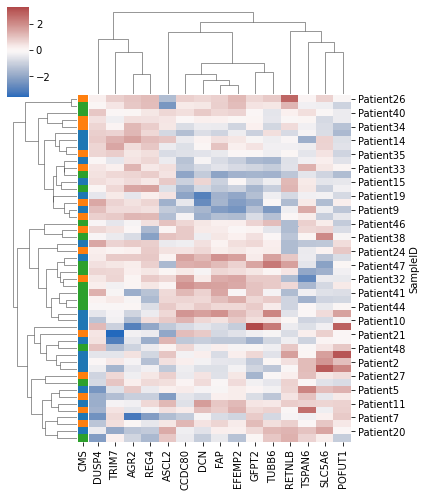

In [8]:
_ = sns.clustermap(data = expr_data, metric = 'correlation', method = 'average', 
                   z_score = 1, figsize = (6, 7), cmap = 'vlag', center = 0, 
                   row_cluster = True, col_cluster = True, 
                   row_colors = data['CMS'].map(cms_color_map), col_colors = None)

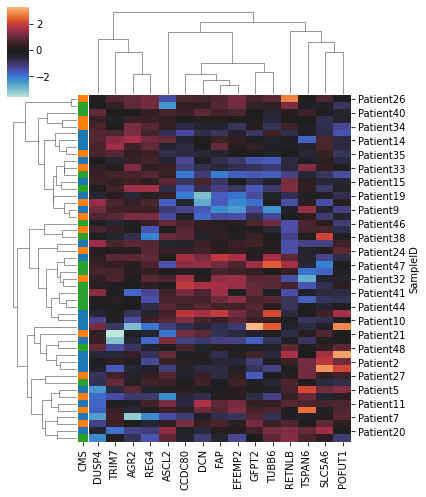

In [9]:
_ = sns.clustermap(data = expr_data, metric = 'correlation', method = 'average', 
                   z_score = 1, figsize = (6, 7), cmap = 'icefire', center = 0, 
                   row_cluster = True, col_cluster = True, 
                   row_colors = data['CMS'].map(cms_color_map), col_colors = None)

## Summarize frequency of samples in each group with pandas's crosstab

In [10]:
pd.crosstab(index = merged['CMS'], columns = merged['KRAS'])

KRAS,mt,wt
CMS,,
CMS1,4,8
CMS2,1,11
CMS3,6,5


### Visualizing frequency table with seaborn's heatmap

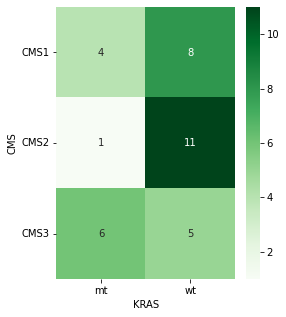

In [13]:
plt.figure(figsize = (4, 5))
sns.heatmap(pd.crosstab(index = merged['CMS'], columns = merged['KRAS']),
            cmap = plt.cm.Greens, annot = True)
plt.yticks(rotation = 0)
plt.show()

## Linear trend plot with seaborn's lmplot

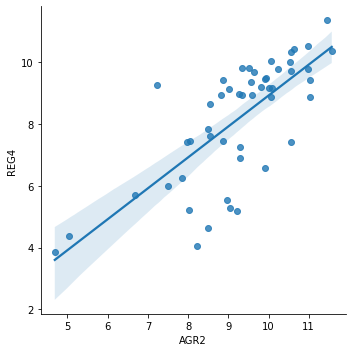

In [14]:
_ = sns.lmplot(data = data, x = 'AGR2', y = 'REG4')

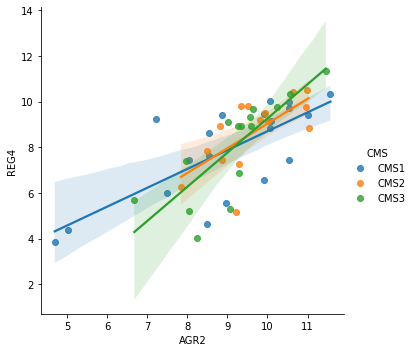

In [15]:
_ = sns.lmplot(data = data, x = 'AGR2', y = 'REG4', hue = 'CMS')

## Pie chart

In [16]:
prop = data['CMS'].value_counts()
prop.head()

CMS1    20
CMS2    15
CMS3    15
Name: CMS, dtype: int64

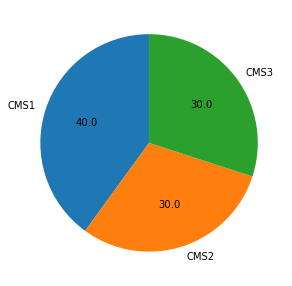

In [20]:
plt.figure(figsize = (5, 5))
plt.pie(prop.values, labels = prop.index, startangle = 90, autopct = '%.1f')
plt.show()

### Highlighting CMS2

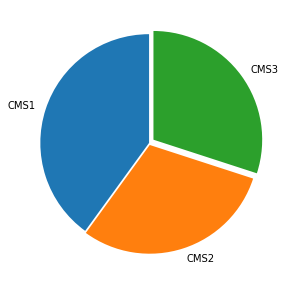

In [23]:
plt.figure(figsize = (5, 5))

explode = (0, 0.02, 0.05)  # only 'explode' the 2nd group
plt.pie(prop.values, explode = explode, labels = prop.index, startangle = 90)

plt.show()

### Donut chart

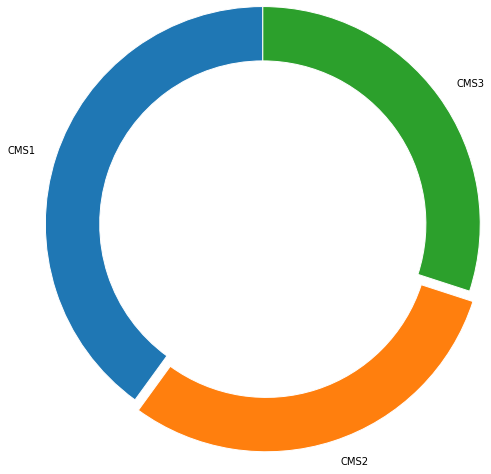

In [26]:
plt.figure(figsize = (5, 5))

explode = (0, 0.1, 0)  # only 'explode' the 2nd group
plt.pie(prop.values, explode = explode, labels = prop.index, startangle = 90, 
        radius = 2, wedgeprops = {'width': 0.5, 'edgecolor': 'white'})

plt.show()